In [14]:
seed = 123
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
random.seed(seed)     # python random generator
np.random.seed(seed) 

from utils.utils_semi import *

# import imageio
path = r'C:\Users\kmorales\Downloads\1070db.tar\pgms'
os.listdir(path)
path_save = r'C:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\Data'
type_image = 'camel'
size = 128
# type_image = 'cattle'
if not os.path.exists(os.path.join(path_save, type_image+'_'+str(size))):
    os.mkdir(os.path.join(path_save, type_image+'_'+str(size)))


# # Read the image file
# image = imageio.imread(file)

# # Perform operations on the image
# # For example, print the shape of the image
# print(image.shape)
# # (108, 115) camel04.pgm

# for image in os.listdir(path):
#     if image.startswith(type_image):
#         print(image)
#         image_file = os.path.join(path, image)
#         img = plt.imread(image_file)
#         plt.imshow(img, cmap='gray')
#         plt.show()
#         plt.axis('off')
#         plt.margins(x=0)
#         plt.savefig(os.path.join(path_save,f'{image}.png'), transparent=True, format='png', bbox_inches='tight', pad_inches=0)
#         plt.close()
#         print(image, img.shape)



In [18]:
0.5*0.5

0.25

In [77]:
multi_noise = True
mu_general = 0.4
mu_multi = 0.5
mu = mu_general if not multi_noise else mu_multi
sigma_general = 0.5
sigma_multi = 0.2
sigma  = sigma_general if not multi_noise else sigma_multi
p = 0.6 #* probability of missing labels

image = 'camel04.pgm'
image_file = os.path.join(path, image)
img = plt.imread(image_file)//255
image = cv2.resize(img, (size, size)).astype('int16')
chain = image_to_chain(image)
x = np.zeros(len(chain))
if not multi_noise:
    for t in range(len(chain)):
        if t == 0:
            x[t] = np.random.normal(np.sin(mu*(chain[t])), sigma, 1)
        else:
            x[t] = np.random.normal(np.sin(mu*(chain[t]) + x[t-1]), sigma, 1)
if multi_noise:
    z = np.random.normal(size = len(chain))
    for t in range(len(chain)):
        x[t] = z[t]*np.random.normal(mu*(chain[t]), sigma, 1)

image_x = chain_to_image(x).reshape(size, size)
mask_missing = np.random.choice([0,1], size=image.shape, p=[p, 1-p])
label_miss = image.copy()
label_miss[mask_missing==0] = -1


In [78]:
image

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int16)

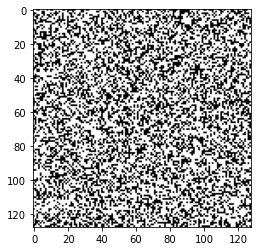

(array([-1,  0,  1], dtype=int16), array([9901, 2905, 3578], dtype=int64))

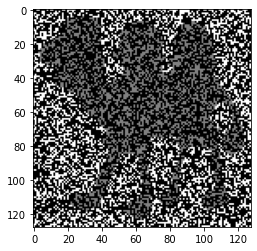

In [80]:
p = 0.6 #* probability of missing labels

plt.imshow(1*(mask_missing==0),  cmap='gray')
plt.show()
plt.imshow(label_miss, cmap='gray')
np.unique(label_miss, return_counts=True)

(array([0, 1]), array([ 3314, 13070], dtype=int64))

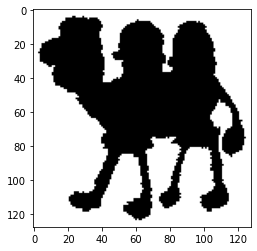

In [66]:
mask_missing = np.random.choice([0,1], size=image.shape, p=[p, 1-p])
label_miss = image.copy()
# label_miss[mask_missing==0] = -1

plt.imshow(label_miss, cmap='gray')
np.unique(mask_missing, return_counts=True)

In [51]:
def create_missing_labels(im ,p):
    '''
    p = probability of missing a pixel
    '''
    mask_missing = np.random.choice([0,1], size=im.shape, p=[p, 1-p])
    label_miss = im.copy()
    label_miss[mask_missing==0] = -1
    return label_miss

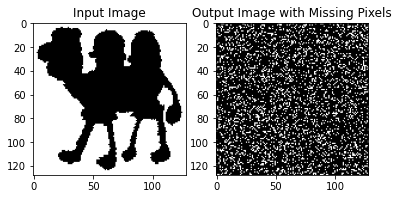

In [54]:

# Assuming 'im' is your input image
p = 0.2
label_miss = create_missing_labels(image, p)

# Display the input image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Image')

# Display the output image with missing pixels
plt.subplot(1, 2, 2)
plt.imshow(label_miss, cmap='gray')
plt.title('Output Image with Missing Pixels')

plt.show()

In [28]:
# More complex noisy image
# mu*(chain[i]) is the mean of the normal distribution and it changes for each pixel with respect to the label at that pixel
# z = np.random.normal(size = len(chain))
# x = np.array([  z[i]*np.random.normal(mu*(chain[i]), sigma, 1) for i in range(len(chain)) ])
# x = np.array([np.random.normal(mu*(chain[i]), sigma, 1) for i in range(len(chain)) ])
# # In order to recuperate the original image we need to remove the first 2 and last 2 elements of the chain
image_x = chain_to_image(x).reshape(size, size)
# mask_missing = np.random.choice([0,1], size=(size, size), p=[p, 1-p])
# label_miss = img.reshape(size, size).copy()
# label_miss[mask_missing==0] = -1


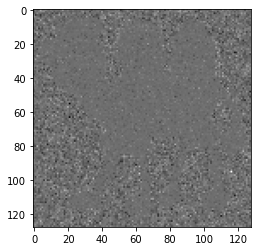

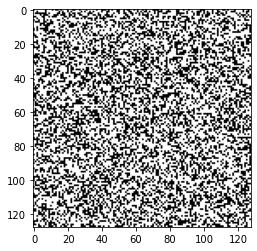

In [52]:
label_miss = create_missing_labels(image, p)
plt.imshow(image_x, cmap='gray')
plt.show()
plt.imshow(label_miss, cmap='gray')
plt.show()

In [55]:
# label_miss = create_missing_labels(image, p)
np.unique(label_miss, return_counts=True)

(array([  0,   1, 246], dtype=uint8), array([5877, 7314, 3193], dtype=int64))

In [56]:
np.unique(image, return_counts=True)

(array([0, 1], dtype=uint8), array([7275, 9109], dtype=int64))

In [ ]:
def creation_noisy_image(img, mu, sigma,p,  size, stat):
    '''
    image: image of size 28*28
    Binary mask: 0 if the pixel is the background, 1 otherwise (part of the number)
    
    chain: chain of the image (Hilbert curve) which is a vector of size size*size 
    z =  N(0, 1) # random variable wich
    x = z* N(mu, sigma)

    return:
    image_x: image with noise (28*28)
    label_miss: input image with missing labels (28*28)
    '''
    # We use np.pad to add a border of 0 to the image and increase the size to 32*32 beacause:
    # 1D sequence <-> image, using an hilbert curve requires the sequence have length equal to a --power of 2--    
    # This is not a general solution, but it works for the MNIST dataset
    image = img.reshape(size, size)
    chain = image_to_chain(image)
    
    # More complex noisy image
    # mu*(chain[i]) is the mean of the normal distribution and it changes for each pixel with respect to the label at that pixel
    # z = np.random.normal(size = len(chain))
    # x = np.array([  z[i]*np.random.normal(mu*(chain[i]), sigma, 1) for i in range(len(chain)) ])
    x = np.array([np.random.normal(mu*(chain[i]), sigma, 1) for i in range(len(chain)) ])
    # In order to recuperate the original image we need to remove the first 2 and last 2 elements of the chain
    image_x = chain_to_image(x)[2:(2+size), 2:(2+size)]
    mask_missing = np.random.choice([0,1], size=(size, size), p=[p, 1-p])
    label_miss = img.reshape(size, size).copy()
    label_miss[mask_missing==0] = -1

    return image, image_x, label_miss



In [ ]:
#name _01 params = {'p': 0.4, 'mu': 1, 'sigma': 0.25, 'size': 28}
# without complex noisy images
p = 0.4 
mu = 1
sigma = 0.25
size = 28

creation_noisy_image(img, mu, sigma,p, size )

trainX_seq = semi_sup_preprocessing(trainX, p, mu, sigma, size)
testX_seq = semi_sup_preprocessing(testX, p, mu, sigma, size)
np.save(os.path.join(general_path, folder_data,'trainX_seq-01.npy'), trainX_seq)
np.save(os.path.join(general_path, folder_data,'testX_seq-01.npy'), testX_seq)


In [ ]:

for img in sorted(os.listdir(folder_data)):
    if img.startswith('x'):
        x_list.append(plt.imread(os.path.join(folder_data, img)))
    if img.startswith('y') and not img.endswith('npy'):
        y = plt.imread(os.path.join(folder_data, img))
        y_list.append(y)
        # Only if we want to create the missing labels for different probabilities
#         for p in probabilities:
#             if p == 0.4:
#                 y_list_40.append(create_missing_labels(y, p))
#             elif p == 0.6:
#                 y_list_60.append(create_missing_labels(y, p))
#             elif p == 0.8:
#                 y_list_80.append(create_missing_labels(y, p))
#             elif p == 1:
#                 y_list_100.append(create_missing_labels(y, p))
        
# np.save(os.path.join(general_path, folder_data, 'y_miss_40.npy'), y_list_40)
# np.save(os.path.join(general_path, folder_data, 'y_miss_60.npy'), y_list_60)
# np.save(os.path.join(general_path, folder_data, 'y_miss_80.npy'), y_list_80)
# np.save(os.path.join(general_path, folder_data, 'y_miss_100.npy'), y_list_100)